# Introduction

Anyone with a bank account currently living must have encountered the words 'Transaction Fraud'. It might be their personal experience or a third-party experience heard from someone else or from agents selling insurance. As the world is becoming more and more digital, the transaction frauds are also increasing at a rapid pace. In a study, it is found out that 24 bilion USD is lost due to credit card fraud transactions in one year.Banking and financial institutions are facing severe challenges due to fraudulent transactions.

To tackle these frauds, there is a need for banks to put strategies in place so that customers' money is not lost. The most common strategy used by banks is put a threshold on transaction amount and any transaction above that amount requires multiple-authentications from customer. This method works well in most of the cases but it is a crude way to make a fraud strategy as it spoils the customer experience. Also having a dumb strategy like this would not work because of the fraudsters' scary ability of adapting to different environments. An evolving and intelligent fraud policy is the best solution to this problem. Machine learning is the perfect answer and algorithms like Boosting and Regression can be used to classify frauds.

Post building a model, we can use this to predict whether a fraud can happen or not and only authenticate a transaction if the model says so. There is another problem that many banks encounter while model implementation that is to run the model on real-time basis and give results instantly. Unlike models to optimize marketing campaigns or determine customer's risk score which can be done in batch, transaction models need to be run on real-time. Hence there is lot of emphasis on big data cloud platforms like AWS, Azure and Hadoop that stores data and implement machine learning models on scale when considering transaction frauds.

Multiple supervised learning models are used in this exercise to detect the frauds

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as pl2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,roc_auc_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Input,BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploratory Data Analysis

According to the data we saw above, there are only three known variables - Time, Amount and Class. The remaining variables are encoded. Simple univariate and bivariate analysis are done on these variables

### Univariate Analysis - Class

0    284315
1       492
Name: Class, dtype: int64


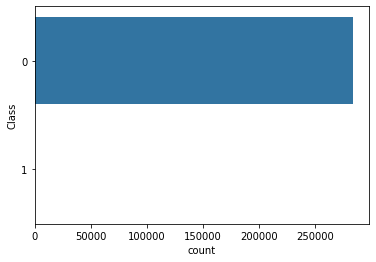

In [8]:
print(df.Class.value_counts())
sns.countplot(y="Class",data=df)
plt.show()

The above plot shows us a skewed data in terms of fraud.

### Univariate Analysis - Amount

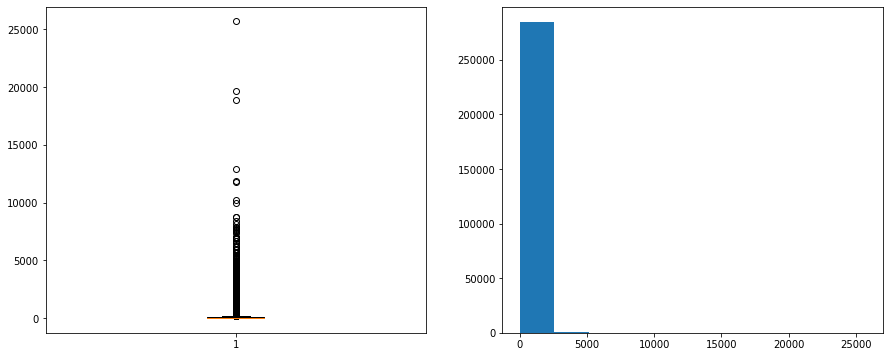

In [9]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
ax[0].boxplot(x=df.Amount)
ax[1].hist(x=df.Amount)
fig.show()

There seems to be very large outliers in Amount variable.

### Bivariate Analysis - Time Vs Class

Time can be used to create variables like Hour, MinuteofDay and HourofDay to see at which most amount of frauds occured

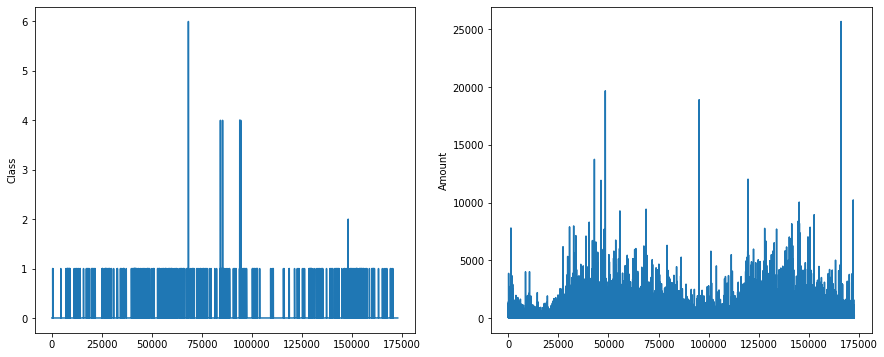

In [10]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.lineplot(x=list(df.Time.unique()),y=df.groupby("Time")["Class"].sum(),ax=ax[0])
sns.lineplot(x=list(df.Time.unique()),y=df.groupby("Time")["Amount"].sum(),ax=ax[1])
plt.show()

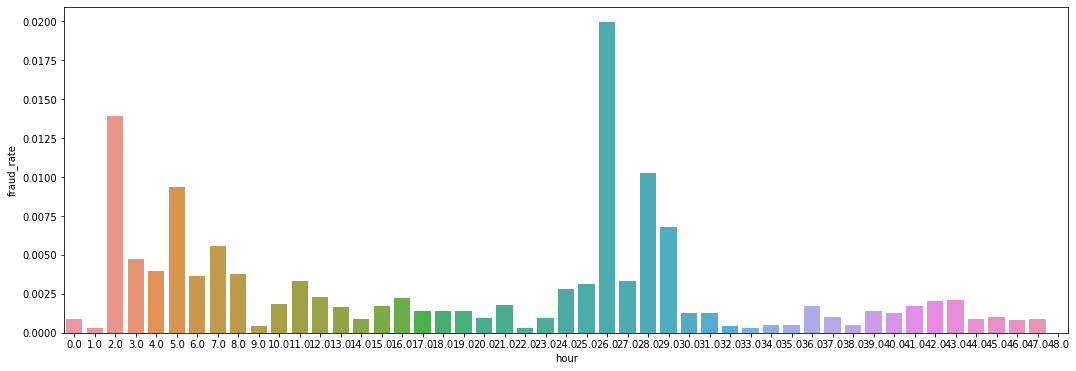

In [11]:
df["hour"] = round(df.Time / 3600)
frauds_hour = pd.concat([df.groupby("hour")["Class"].sum(),df.groupby("hour")["Class"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
plt.subplots(1,1,figsize=(18,6))
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

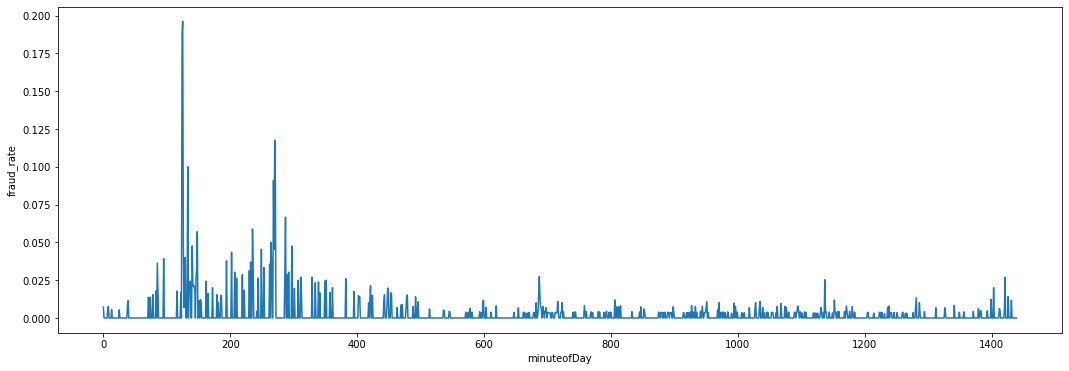

In [12]:
df["minuteofDay"] = (round(df.Time / 60))%(24*60)
frauds_hour = pd.concat([df.groupby("minuteofDay")["Class"].sum(),df.groupby("minuteofDay")["Class"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
plt.subplots(1,1,figsize=(18,6))
sns.lineplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

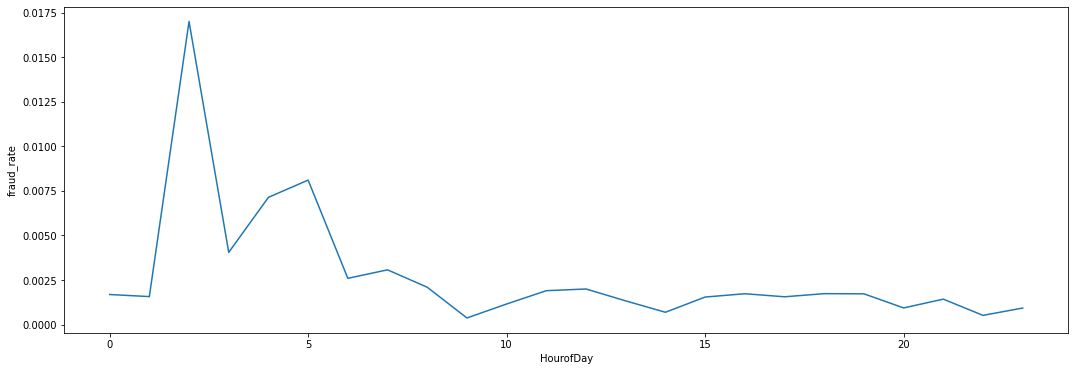

In [13]:
df["HourofDay"] = (round(df.Time / (60*60)))%(24)
frauds_hour = pd.concat([df.groupby("HourofDay")["Class"].sum(),df.groupby("HourofDay")["Class"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
plt.subplots(1,1,figsize=(18,6))
sns.lineplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

We can see from the above plots that the fraud rate is highest during midnight

### Bivariate Analysis - Class vs Amount

<AxesSubplot:xlabel='Class', ylabel='Amount'>

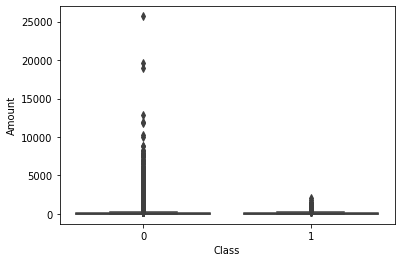

In [14]:
sns.boxplot(x="Class",y="Amount",data=df)

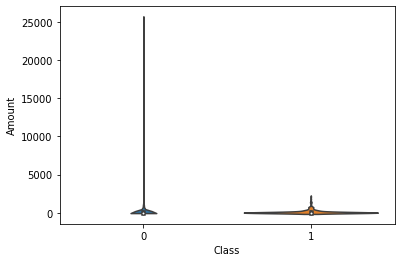

In [15]:
sns.violinplot(x="Class",y="Amount",data=df)
plt.show()

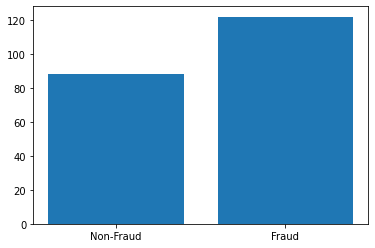

In [16]:
plt.bar(x=["Non-Fraud","Fraud"],height=df.groupby("Class")["Amount"].mean())
plt.show()

The above plots show us that Fraud cases have a higher transaction amount compared to non-fraud cases.

### Principal Component Analysis

To check whether frauds are very different to non-frauds, one way is to visualize them on a 2D plane. PCA can be used to get the 33 dimensions to 2 dimensions.

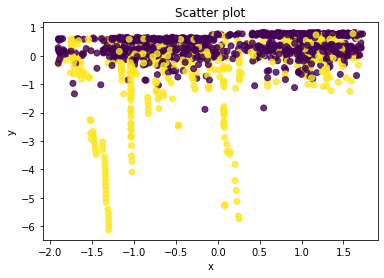

In [17]:
non_fraud = df[df['Class'] == 0].sample(1000)
fraud = df[df['Class'] == 1]

df1 = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df1.drop(['Class'], axis = 1).values
Y = df1["Class"].values
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']

# Plot
import matplotlib.pyplot as plt
plt.scatter(X[0], X[1], c=Y, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

From the above plot, we can see that frauds are different to non-frauds and classification models can help detect the frauds

# Issues with the data

**Issue 1** : There are lot of transactions in the data and building complex models can take lot of time. 

**Solution**: Use parallel processing techniques like PySpark to preprocess the data and build models.

**Issue 2** : The event rate is very less and hence there is less information to predict the frauds.

**Solution**: Use sampling techniques or anomaly detection models. Also use F1 score or AUC to tune the models.

**Issue 3** : Lot of outliers in the data but we cannot remove them as frauds are generally outliers.

**Solution**: Transform (Log) the variables so that the gap between outliers and non-outliers decrease

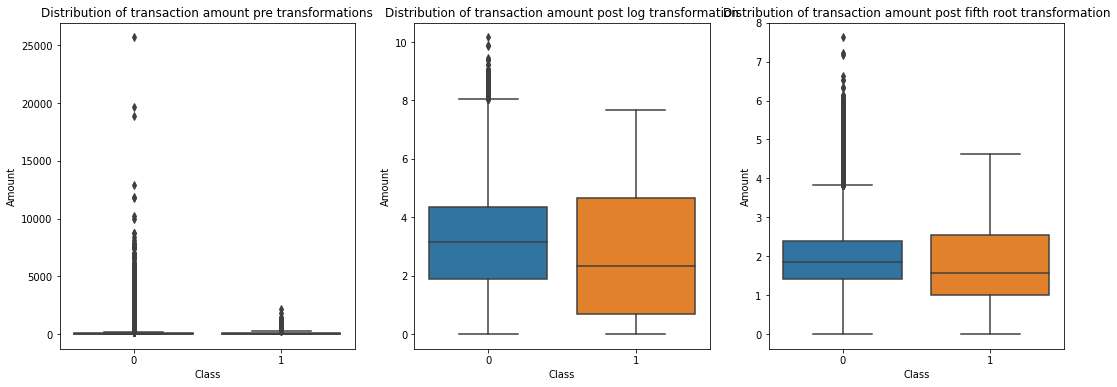

In [18]:
fig,ax = plt.subplots(1,3,figsize=(18,6))
ax[0].title.set_text("Distribution of transaction amount pre transformations")
ax[1].title.set_text("Distribution of transaction amount post log transformation")
ax[2].title.set_text("Distribution of transaction amount post fifth root transformation")
sns.boxplot(x=df.Class, y=df.Amount,ax=ax[0])
sns.boxplot(x=df.Class,y=np.log1p(df.Amount),ax=ax[1])
sns.boxplot(x=df.Class,y=(df.Amount)**(1./5),ax=ax[2])
fig.show()

# Feature Generation

As discussed above, log transformations can help reduce the outliers. But we cannot do log trasformations on negative values. hence fifth root transformation is done

In [19]:
df2=df.copy()
for var in df2.drop(["Time","Class","hour","minuteofDay","HourofDay"],axis=1).columns:
    df2[var+"_log"] = np.log(df2[var]+1000)
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20_log,V21_log,V22_log,V23_log,V24_log,V25_log,V26_log,V27_log,V28_log,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,6.908007,6.907737,6.908033,6.907645,6.907822,6.907884,6.907566,6.907889,6.907734,7.047187
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,6.907686,6.907529,6.907116,6.907857,6.907415,6.907922,6.907881,6.907746,6.907770,6.910442
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,6.908280,6.908003,6.908527,6.908664,6.907066,6.907428,6.907616,6.907700,6.907696,7.228867
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,6.907547,6.907647,6.907761,6.907565,6.906579,6.908402,6.907533,6.907818,6.907817,7.024204
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,6.908164,6.907746,6.908553,6.907618,6.907897,6.907549,6.908257,6.907975,6.907970,6.975405


# Model Development

Multiple classfication algorithms are explored below. Before modelling, the data is split into train and test sample. 

In [20]:
X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170884, 62)
(113923, 62)
(170884,)
(113923,)


In all models, data is normalized using *StandardScaler()* and undersampled using imblearn package's *RandomUnderSampler()* function. Under sampling is used here so that the computation is fast.

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)

parameters = {'max_depth':[3,4,5]
    }

dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(dt,parameters,scoring="f1",verbose=True)

dt_cv.fit(X_train,y_train)
print(classification_report(dt_cv.best_estimator_.predict(X_test),y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113631
           1       0.87      0.59      0.70       292

    accuracy                           1.00    113923
   macro avg       0.94      0.79      0.85    113923
weighted avg       1.00      1.00      1.00    113923



[Text(385.02000000000004, 489.24, 'V14 <= -3.808\ngini = 0.091\nsamples = 6195\nvalue = [5900, 295]'),
 Text(200.88000000000002, 380.52000000000004, 'V10 <= 1.03\ngini = 0.154\nsamples = 249\nvalue = [21, 228]'),
 Text(133.92000000000002, 271.8, 'V7 <= 0.804\ngini = 0.034\nsamples = 232\nvalue = [4, 228]'),
 Text(66.96000000000001, 163.08000000000004, 'gini = 0.0\nsamples = 223\nvalue = [0, 223]'),
 Text(200.88000000000002, 163.08000000000004, 'V23 <= -0.628\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(267.84000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(267.84000000000003, 271.8, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(569.1600000000001, 380.52000000000004, 'V17_log <= -2.395\ngini = 0.022\nsamples = 5946\nvalue = [5879, 67]'),
 Text(401.76000000000005, 271.8, 'V4 <= -0.502\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(334.8000000000

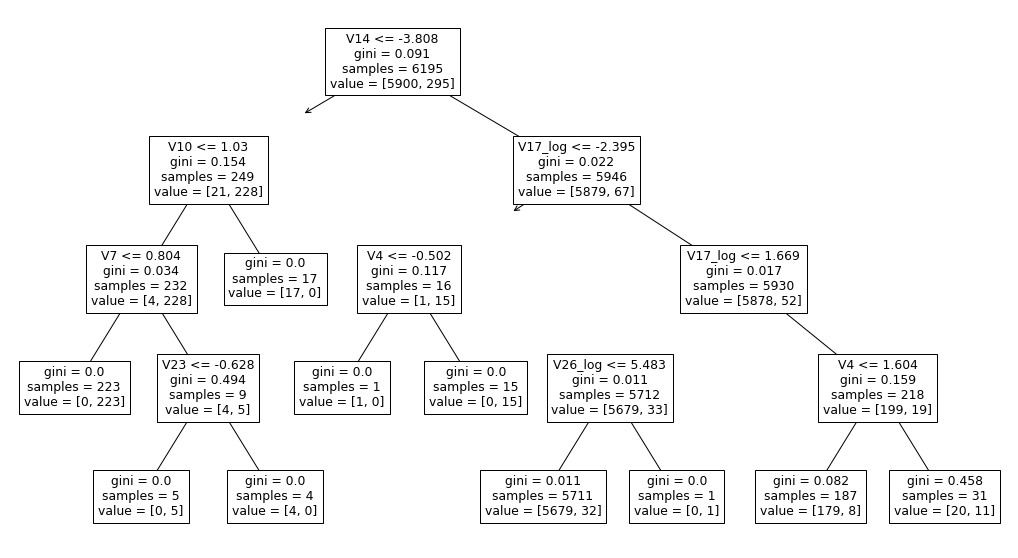

In [22]:
plt.subplots(figsize=(18,10))
plot_tree(dt_cv.best_estimator_,feature_names = df2.drop("Class",axis=1).columns)

## Logistic Regression

In [23]:
X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)

logreg = LogisticRegression(max_iter=1000000)

parameters = {'solver':['saga'],
              'penalty':['l1'],
              'C': [1,0.1,10]
    }

logreg_cv = GridSearchCV(logreg,parameters,scoring="f1",verbose=True,cv=3)

logreg_cv.fit(X_train,y_train)
print(classification_report(logreg_cv.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113542
           1       0.91      0.47      0.62       381

    accuracy                           1.00    113923
   macro avg       0.95      0.73      0.81    113923
weighted avg       1.00      1.00      1.00    113923



In [24]:
logreg_cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

### K Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])

X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)

parameters = {'n_neighbors':[5,10],
              'weights':['distance'],
              'p': [1,2]
    }
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn,parameters,scoring="f1",verbose=True,cv=3)

knn_cv.fit(X_train,y_train)
print(classification_report(knn_cv.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113607
           1       0.89      0.55      0.68       316

    accuracy                           1.00    113923
   macro avg       0.94      0.78      0.84    113923
weighted avg       1.00      1.00      1.00    113923



In [26]:
knn_cv.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

### Linear SVM

In [27]:
from sklearn.svm import LinearSVC
X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])

X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)

lsvm = LinearSVC(max_iter = 10000000)

parameters = {'penalty':['l2'],
              'C': [1,10,100]
    }

lsvm_cv = GridSearchCV(lsvm,parameters,scoring="f1",verbose=True,cv=3)

lsvm_cv.fit(X_train,y_train)
print(classification_report(lsvm_cv.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113321
           1       0.90      0.29      0.44       602

    accuracy                           1.00    113923
   macro avg       0.95      0.65      0.72    113923
weighted avg       1.00      1.00      1.00    113923



In [28]:
lsvm_cv.best_params_

{'C': 100, 'penalty': 'l2'}

### Non Linear SVM

In [29]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)

psvm = SVC(max_iter = 10000000,kernel="poly")
parameters = {'C': [0.01,0.001],
              'degree': [3,4]  
    }

psvm_cv = GridSearchCV(psvm,parameters,scoring="f1",verbose=True,cv=3)

psvm_cv.fit(X_train,y_train)
print(classification_report(psvm_cv.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113675
           1       0.83      0.66      0.73       248

    accuracy                           1.00    113923
   macro avg       0.91      0.83      0.87    113923
weighted avg       1.00      1.00      1.00    113923



### Gradient Boosting

In [30]:
X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)

parameters = {'learning_rate':[0.01,0.1],
              'n_estimators':[100,300],
              'max_depth':[3,5]   
    }

gbm = GradientBoostingClassifier(max_features='sqrt',subsample=0.7,n_iter_no_change=5)
gbm_cv = GridSearchCV(gbm,parameters,scoring="f1",verbose=True,cv=3)

gbm_cv.fit(X_train,y_train)
print(classification_report(gbm_cv.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113664
           1       0.88      0.67      0.76       259

    accuracy                           1.00    113923
   macro avg       0.94      0.84      0.88    113923
weighted avg       1.00      1.00      1.00    113923



In [31]:
gbm_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

### Random Forests

In [32]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)

parameters = {'n_estimators':[500,1000],
              'max_depth':[5,7],
              'max_samples':[0.5,0.7]
    }
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf,parameters,scoring="f1",verbose=True,cv=3)

rf_cv.fit(X_train,y_train)
print(classification_report(rf_cv.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113685
           1       0.88      0.73      0.80       238

    accuracy                           1.00    113923
   macro avg       0.94      0.87      0.90    113923
weighted avg       1.00      1.00      1.00    113923



# Sampling techniques

The above models used undersampling as the sampling strategy. There are lot of other sampling techniques thant can be used which are explored in the below section. LightGBM is used as a reference because the algorithm takes very less amount of time to perform boosting without comprimising on performance. 

### Under Sampling

Undersampling reduces the number of samples in the majority class so that the final event rate is large enough. This method is not recommended as undersampling results in loss of data.

In [33]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)


lgbm2 = LGBMClassifier()

parameters = {'learning_rate':[0.1,0.3],
              'n_estimators':[500,1000],
              'max_depth':[5,7],
              'num_leaves':[6,8]
    }

lgbm_cv2 = GridSearchCV(lgbm2,parameters,scoring="f1",verbose=True,cv=3)

lgbm_cv2.fit(X_train,y_train)
print(classification_report(lgbm_cv2.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113590
           1       0.90      0.53      0.67       333

    accuracy                           1.00    113923
   macro avg       0.95      0.77      0.84    113923
weighted avg       1.00      1.00      1.00    113923



In [34]:
lgbm_cv2.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500, 'num_leaves': 8}

### Over Sampling

This technique duplicates the samples in minority class and thereby increases the event rate. Over Sampling is the most commonly used technique but the downside is the number of samples increases and resources concern may rise.

In [35]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomOverSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)


lgbm3 = LGBMClassifier()

parameters = {'learning_rate':[0.1,0.3],
              'n_estimators':[500,1000],
              'max_depth':[5,7],
              'num_leaves':[6,8]
    }

lgbm_cv3 = GridSearchCV(lgbm3,parameters,scoring="f1",verbose=True,cv=3)

lgbm_cv3.fit(X_train,y_train)
print(classification_report(lgbm_cv3.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113758
           1       0.81      0.96      0.88       165

    accuracy                           1.00    113923
   macro avg       0.90      0.98      0.94    113923
weighted avg       1.00      1.00      1.00    113923



### SMOTE

Instead of just duplicating the minority class to oversample the data, SMOTE generates new minority samples using the existing ones. This technqiue requires even more computational resources compared to just Over Sampling. 

In [36]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = SMOTE(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)


lgbm4 = LGBMClassifier()

parameters = {'learning_rate':[0.1,0.05],
              'n_estimators':[500,1000],
              'max_depth':[5,3],
              'num_leaves':[8]
    }

lgbm_cv4 = GridSearchCV(lgbm4,parameters,scoring="f1",verbose=True,cv=3)

lgbm_cv4.fit(X_train,y_train)
print(classification_report(lgbm_cv4.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113680
           1       0.87      0.71      0.78       243

    accuracy                           1.00    113923
   macro avg       0.94      0.85      0.89    113923
weighted avg       1.00      1.00      1.00    113923



### KMeans SMOTE

This algorithm runs a K Means clustering prior to SMOTE sampling and samples based on k-means clusters.

In [37]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = KMeansSMOTE(sampling_strategy=0.01,random_state=1234,cluster_balance_threshold=0.001).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)


lgbm6 = LGBMClassifier()

parameters = {'learning_rate':[0.1,0.05],
              'n_estimators':[500,1000],
              'max_depth':[5,3],
              'num_leaves':[8]
    }

lgbm_cv6 = GridSearchCV(lgbm6,parameters,scoring="f1",verbose=True,cv=3)

lgbm_cv6.fit(X_train,y_train)
print(classification_report(lgbm_cv6.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113749
           1       0.83      0.94      0.88       174

    accuracy                           1.00    113923
   macro avg       0.92      0.97      0.94    113923
weighted avg       1.00      1.00      1.00    113923



### ADASYN

Adaptive Synthetic algorithm is an extension of SMOTE. It randomises the points to give color of reality to the data. 

In [38]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,KMeansSMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = ADASYN(sampling_strategy=0.01,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)


lgbm7 = LGBMClassifier()

parameters = {'learning_rate':[0.1,0.05],
              'n_estimators':[500,1000],
              'max_depth':[5,3],
              'num_leaves':[8]
    }

lgbm_cv7 = GridSearchCV(lgbm7,parameters,scoring="f1",verbose=True,cv=3)

lgbm_cv7.fit(X_train,y_train)
print(classification_report(lgbm_cv7.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113683
           1       0.85      0.70      0.76       240

    accuracy                           1.00    113923
   macro avg       0.92      0.85      0.88    113923
weighted avg       1.00      1.00      1.00    113923



### No Sampling

A model is run without any sampling for reference.

In [39]:
X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

lgbm5 = LGBMClassifier()

parameters = {'learning_rate':[0.1,0.05],
              'n_estimators':[500,1000],
              'max_depth':[5,3],
              'num_leaves':[8]
    }

lgbm_cv5 = GridSearchCV(lgbm5,parameters,scoring="f1",verbose=True,cv=3)

lgbm_cv5.fit(X_train,y_train)
print(classification_report(lgbm_cv5.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113800
           1       0.01      0.02      0.01       123

    accuracy                           1.00    113923
   macro avg       0.50      0.51      0.51    113923
weighted avg       1.00      1.00      1.00    113923



In [40]:
lgbm_cv5.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 8}

### Light GBM weights scaling

In [41]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

from lightgbm import LGBMClassifier

lgbm8 = LGBMClassifier()

parameters = {'learning_rate':[0.01,0.007],
              'n_estimators':[300,500],
              'max_depth':[5,4],
              'scale_pos_weight':[10,5],
              'num_leaves':[8,6]
    }

lgbm_cv8 = GridSearchCV(lgbm8,parameters,scoring="f1",verbose=True,cv=3)

lgbm_cv8.fit(X_train,y_train)
print(classification_report(lgbm_cv8.best_estimator_.predict(X_test),y_test))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113719
           1       0.84      0.81      0.83       204

    accuracy                           1.00    113923
   macro avg       0.92      0.91      0.91    113923
weighted avg       1.00      1.00      1.00    113923



In [42]:
lgbm_cv8.best_params_

{'learning_rate': 0.007,
 'max_depth': 5,
 'n_estimators': 500,
 'num_leaves': 8,
 'scale_pos_weight': 5}

### Fully tuned Light GBM

We saw that over sampling followed by LightGBM gave us the best results. But there is still some scope to improve the model results by tuning the hyper parameters. One popular way to automatically tune hyperparameters is Bayesian Optimization

In [43]:

def hyperopt(param_space, X_train, y_train, X_test, y_test, num_eval):
    
    start = time.time()
    
    def objective_function(params):
        clf = LGBMClassifier(**params)
        score = cross_val_score(clf, X_train, y_train, cv=5,scoring="f1").mean()
        return {'loss': 1-score, 'status': STATUS_OK}

    trials = Trials()
    best_param = fmin(objective_function, 
                      param_space, 
                      algo=tpe.suggest, 
                      max_evals=num_eval, 
                      trials=trials,
                      rstate= np.random.RandomState(1))
    loss = [x['result']['loss'] for x in trials.trials]
    
    best_param_values = [x for x in best_param.values()]
    
    if best_param_values[0] == 0:
        boosting_type = 'gbdt'
    else:
        boosting_type= 'dart'
    
    clf_best = LGBMClassifier(learning_rate=best_param_values[2],
                                  num_leaves=int(best_param_values[5]),
                                  max_depth=int(best_param_values[3]),
                                  n_estimators=int(best_param_values[4]),
                                  boosting_type=boosting_type,
                                  colsample_bytree=best_param_values[1],
                                  reg_lambda=best_param_values[6],
                                 )
                                  
    clf_best.fit(X_train, y_train)
    
    print("")
    print("##### Results")
    print("Score best parameters: ", min(loss)*+1)
    print("Best parameters: ", best_param)
    print("Test Score: ", f1_score(y_test,clf_best.predict(X_test)))
    print("Time elapsed: ", time.time() - start)
    print("Parameter combinations evaluated: ", num_eval)
    
    return trials


In [44]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import time
from hyperopt.pyll import scope
from sklearn.model_selection import cross_val_score

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomOverSampler(sampling_strategy=0.05,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)

param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.007), np.log(0.7)),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 7, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 200, 700, 50)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 30, 5)),
    'boosting_type': hp.choice('boosting_type', ['gbdt']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.7, 0.9),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'scale_pos_weight':scope.int(hp.quniform('scale_pos_weight', 3, 15, 1))
}
num_eval=50
results_hyperopt = hyperopt(param_hyperopt, X_train, y_train, X_test, y_test, num_eval)

100%|██████████| 50/50 [31:16<00:00, 37.53s/trial, best loss: 0.0008200150887784918]

##### Results
Score best parameters:  0.0008200150887784918
Best parameters:  {'boosting_type': 0, 'colsample_by_tree': 0.8124735963717353, 'learning_rate': 0.3008437124652882, 'max_depth': 4.0, 'n_estimators': 400.0, 'num_leaves': 20.0, 'reg_lambda': 0.0967190398186264, 'scale_pos_weight': 11.0}
Test Score:  0.8407310704960835
Time elapsed:  1885.9637143611908
Parameter combinations evaluated:  50


From the results above, we can see that the best F1 score is ~0.84 which is similar to the results we got without baysesian optimization.

# Other Modelling techniques

There are some unsupervised learning technqiues that can be used to predict frauds like Isolation Forest and One Class SVM. These models are generally used to detect anomalies. Since frauds are also kind of anamolies, we can use them to detect frauds. Since there are some outliers in non-fraud cases too, the outlier techniques may not perform well in this case

### Isolation Forest

In [45]:
from sklearn.ensemble import IsolationForest

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train1 = X_train[y_train==0].copy()
X_train1 = StandardScaler().fit_transform(X_train1)
X_train1 = pd.DataFrame(X_train1)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

irf = pl2([
    ('stdize',StandardScaler()),
    ('clf',IsolationForest(n_estimators=200,contamination=0.001))
    ])

X_train1 = X_train[y_train==0].copy()

irf.fit(X_train1)

y_pred = irf.predict(X_test)
y_pred1 = np.where(y_pred==-1,1,0)
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.59      1.00      0.75     67665
           1       0.98      0.00      0.01     46258

    accuracy                           0.60    113923
   macro avg       0.79      0.50      0.38    113923
weighted avg       0.75      0.60      0.45    113923



### One Class SVM

In [46]:
from sklearn.svm import OneClassSVM
X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train1 = X_train[y_train==0].copy()
X_train1 = StandardScaler().fit_transform(X_train1)
X_train1 = pd.DataFrame(X_train1)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
osvm = pl2([
    ('stdize',StandardScaler()),
    ('clf',OneClassSVM(kernel='rbf', nu=0.0005,gamma=0.007))
    ])

osvm.fit(X_train1)

y_pred = osvm.predict(X_test)
y_pred1 = np.where(y_pred==-1,1,0)
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113315
           1       0.71      0.23      0.35       608

    accuracy                           1.00    113923
   macro avg       0.85      0.61      0.67    113923
weighted avg       0.99      1.00      0.99    113923



Deep learning techniques can also be used in both supervised and unsupervised learning points of view. A normal neutral network can be used to classify frauds. A unsupervised learning technique like Autoencoders can be used to separate anamolies. A simple neural network is built below to classify frauds.

### Neural Network

In [47]:
X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.2,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(50,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(25,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(2,activation="softmax"))
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])

early_stopping = EarlyStopping(monitor="val_loss",patience=5)

fitted = model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs=30,
                   callbacks=[early_stopping],batch_size=16)

Epoch 1/30
111/111 [==============================] - 8s 62ms/step - loss: 0.6483 - accuracy: 0.7379 - val_loss: 0.3092 - val_accuracy: 0.9908
Epoch 2/30
111/111 [==============================] - 6s 56ms/step - loss: 0.2870 - accuracy: 0.9311 - val_loss: 0.1108 - val_accuracy: 0.9977
Epoch 3/30
111/111 [==============================] - 6s 56ms/step - loss: 0.1734 - accuracy: 0.9613 - val_loss: 0.0644 - val_accuracy: 0.9963
Epoch 4/30
111/111 [==============================] - 6s 57ms/step - loss: 0.1409 - accuracy: 0.9617 - val_loss: 0.0417 - val_accuracy: 0.9984
Epoch 5/30
111/111 [==============================] - 6s 56ms/step - loss: 0.1101 - accuracy: 0.9711 - val_loss: 0.0330 - val_accuracy: 0.9973
Epoch 6/30
111/111 [==============================] - 6s 56ms/step - loss: 0.0768 - accuracy: 0.9799 - val_loss: 0.0384 - val_accuracy: 0.9949
Epoch 7/30
111/111 [==============================] - 6s 57ms/step - loss: 0.0774 - accuracy: 0.9766 - val_loss: 0.0490 - val_accuracy: 0.9876

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


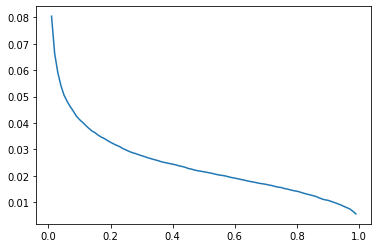

In [48]:
# predict probabilities for test set
yhat_probs = model.predict_proba(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 1]
# yhat_classes = yhat_classes[:, 0]

threshold = list(np.arange(0.01,1,0.01))
f1_list = []
for t in threshold:
    y_pred_newt = [1 if i > t else 0 for i in list(yhat_probs)]
    f1_list.append(f1_score(list(y_test[:,0]),y_pred_newt))
plt.plot(threshold,f1_list)    

In [49]:
y_pred_newt = [1 if i > 0.99 else 0 for i in list(yhat_probs)]
print(classification_report(y_pred_newt,y_test[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113426
           1       0.90      0.36      0.51       497

    accuracy                           1.00    113923
   macro avg       0.95      0.68      0.75    113923
weighted avg       1.00      1.00      1.00    113923



In [50]:
def create_model(learning_rate=0.01,activation="relu",nl=2,nn=50):
    model = Sequential()
    model.add(Dense(50,activation=activation,input_shape=(X_train.shape[1],)))
    for i in range(nl):
        model.add(BatchNormalization())
        model.add(Dense(nn,activation=activation))
    model.add(Dense(2,activation="softmax"))
    opt = Adam(lr=learning_rate)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=["accuracy"])
    return model

X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.2,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

modelcv = KerasClassifier(build_fn=create_model,verbose=0)

params = {}
params["learning_rate"] = [0.1,0.07]
params["activation"] = ["relu","tanh"]
params["batch_size"] = [16,32]
params["nl"] = [4,5]
params["nn"] = [50,75]
params["epochs"] = [10]

nn_cv = GridSearchCV(modelcv,params,cv=3)

nn_cv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1b60ceed50>,
             param_grid={'activation': ['relu', 'tanh'], 'batch_size': [16, 32],
                         'epochs': [10], 'learning_rate': [0.1, 0.07],
                         'nl': [4, 5], 'nn': [50, 75]})

In [51]:
nn_cv.best_params_

{'activation': 'relu',
 'batch_size': 16,
 'epochs': 10,
 'learning_rate': 0.1,
 'nl': 4,
 'nn': 75}

In [52]:
nn_cv.best_score_

0.8333333333333334

# Performance Metrics

Lots of models are built above and we need to compare the results of the models on test dataset.

A small overview of the test dataset

In [53]:
X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])

print(f"The number of transactions in the test dataset are {X_test.shape[0]}")
print(f"The number of frauds in the test dataset are {X_test[y_test==1].shape[0]}")
print(f"Total Transaction amount is {X_test.Amount.sum()}")
print(f"The number of frauds in the test dataset are {X_test[y_test==1].Amount.sum()}")
print(f"% of money lost due to frauds is {X_test[y_test==1].Amount.sum()/X_test.Amount.sum()*100}")

The number of transactions in the test dataset are 113923
The number of frauds in the test dataset are 197
Total Transaction amount is 10080306.620000001
The number of frauds in the test dataset are 23794.550000000003
% of money lost due to frauds is 0.23604986333243105


0.23% of the total transaction amount is lost due to frauds. As the transaction amount is ~10MM in this dataset, the money lost in this case is just 23000 bucks. If we extrapolate this insight to transactions worth 45B dollars, 100MM dollars is lost due to credit card frauds

In [54]:
from sklearn.metrics import f1_score,roc_auc_score,precision_score,recall_score, accuracy_score
def get_perf_metrics(X,y,model):
    X = StandardScaler().fit_transform(X)
    accuracy = accuracy_score(model.predict(X),y)
    precision = accuracy_score(model.predict(X),y)
    recall = recall_score(model.predict(X),y)
    f1 = f1_score(model.predict(X),y)
    auc = roc_auc_score(model.predict(X),y)
    met_dict = {"Actual":list(y),"Predicted":list(model.predict(X))}
    met_df = pd.DataFrame(met_dict)
    met_df["Amount"] = X_test["Amount"]
    losses_saved_ptg = met_df[(met_df.Predicted== 1)&(met_df.Actual==1)].Amount.sum()/met_df[(met_df.Actual==1)].Amount.sum()
    wrong_calls_made = met_df[(met_df.Predicted== 1)&(met_df.Actual==0)].shape[0]
    return [accuracy,precision,recall,f1,auc,losses_saved_ptg,wrong_calls_made]

### Comparing different classification models post undersampling

In [55]:
models = [dt_cv.best_estimator_,logreg_cv.best_estimator_,
          knn_cv.best_estimator_,lsvm_cv.best_estimator_,
          psvm_cv.best_estimator_,gbm_cv.best_estimator_,
          rf_cv.best_estimator_]
modnames = ["Decision Trees","Logistic Regression","K Nearest Neighbors","Linear SVM","Polynomial SVM","Gradient Boosting","Random Forest"]
perf_dict = {}
for i,mod in enumerate(models):
    perf_dict[modnames[i]] = get_perf_metrics(X_test,y_test,mod)

In [56]:
perf_df = pd.DataFrame(perf_dict)
perf_df.index = ["Accuracy","Precision","Recall","F1 Score","AUC","Losses saved","Wrong calls made"]

In [3]:
import pandas as pd
perf_df.transpose()

NameError: name 'perf_df' is not defined

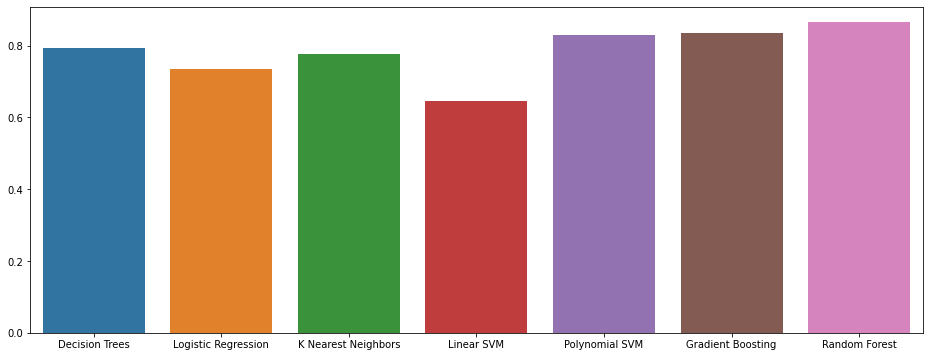

In [58]:
plt.subplots(figsize=(16,6))
sns.barplot(y=perf_df[perf_df.index=="AUC"].values[0],x=perf_df.columns)
plt.show()

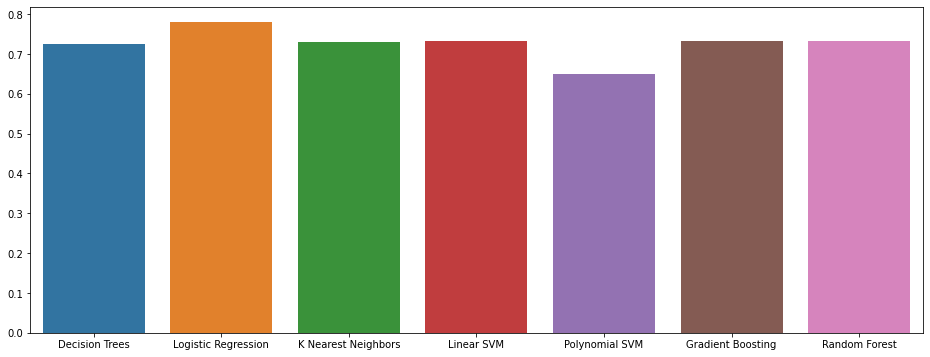

In [59]:
plt.subplots(figsize=(16,6))
sns.barplot(y=perf_df[perf_df.index=="Losses saved"].values[0],x=perf_df.columns)
plt.show()

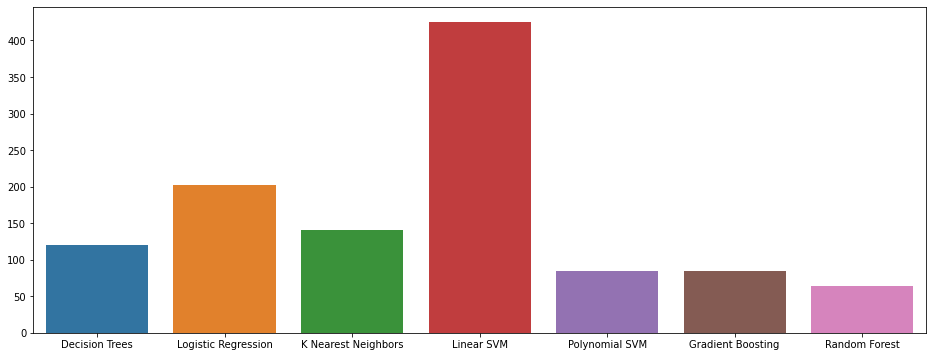

In [60]:
plt.subplots(figsize=(16,6))
sns.barplot(y=perf_df[perf_df.index=="Wrong calls made"].values[0],x=perf_df.columns)
plt.show()

From the above plots, we can see that Random Forest is the best model. If the goal of the bank is to save as many losses as possible, logistic regression is the way to go as the losses saved is the highest. If bank values customer experience more than anything, random forest models results in less number of good transactions marked as fraud. IF the bank wants interpretation maybe because of the regulatory reasons, Decision Tree and Logistic Regression are the best models.

### Comparing different sampling techniques

In [61]:
models = [lgbm_cv5.best_estimator_,lgbm_cv8.best_estimator_,
          lgbm_cv2.best_estimator_,lgbm_cv3.best_estimator_,
          lgbm_cv4.best_estimator_,lgbm_cv6.best_estimator_,
          lgbm_cv7.best_estimator_]
modnames = ["No sampling","Weights scaled","Under Sampling","Over Sampling","SMOTE","KMeans SMOTE","ADASYN"]
perf_dict = {}
for i,mod in enumerate(models):
    perf_dict[modnames[i]] = get_perf_metrics(X_test,y_test,mod)

In [62]:
perf_df = pd.DataFrame(perf_dict)
perf_df.index = ["Accuracy","Precision","Recall","F1 Score","AUC","Losses saved","Wrong calls made"]
perf_df

,No sampling,Weights scaled,Under Sampling,Over Sampling,SMOTE,KMeans SMOTE,ADASYN
Accuracy,0.997226,0.999394,0.998473,0.999614,0.999157,0.999623,0.999096
Precision,0.997226,0.999394,0.998473,0.999614,0.999157,0.999623,0.999096
Recall,0.016260,0.813725,0.534535,0.963636,0.707819,0.942529,0.695833
F1 Score,0.012500,0.827930,0.671698,0.878453,0.781818,0.884097,0.764302
AUC,0.507273,0.906726,0.767184,0.981651,0.853800,0.971119,0.847785
Losses saved,0.001534,0.681084,0.729704,0.614418,0.686185,0.634542,0.692205
Wrong calls made,121.000000,38.000000,155.000000,6.000000,71.000000,10.000000,73.000000


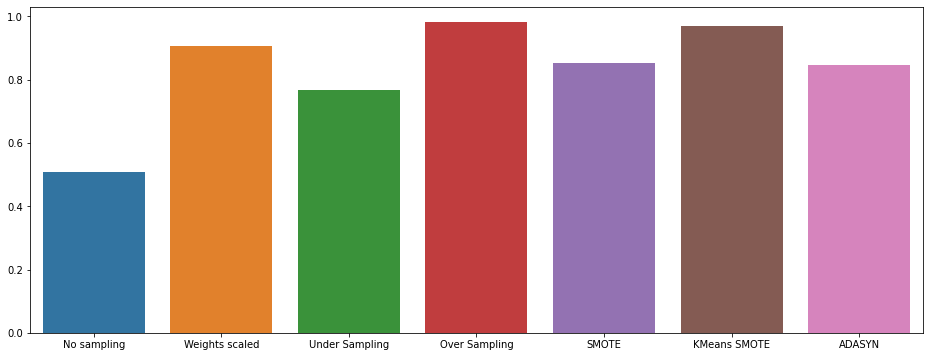

In [63]:
plt.subplots(figsize=(16,6))
sns.barplot(y=perf_df[perf_df.index=="AUC"].values[0],x=perf_df.columns)
plt.show()

KMeans SMOTE and Over sampling gave the best reslts on this dataset. As expected, the no sampling model have the worst results

In [64]:
import time
X_train,X_test,y_train,y_test = train_test_split(df2.drop("Class",axis=1),df2["Class"],
                                                 test_size=0.4,random_state=1234,stratify = df2["Class"])
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_train,y_train = RandomUnderSampler(sampling_strategy=0.2,random_state=1234).fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)

models = [dt_cv.best_estimator_,logreg_cv.best_estimator_,
          knn_cv.best_estimator_,lsvm_cv.best_estimator_,
          psvm_cv.best_estimator_,gbm_cv.best_estimator_,
          rf_cv.best_estimator_]
modnames = ["Decision Trees","Logistic Regression","K Nearest Neighbors","Linear SVM","Polynomial SVM","Gradient Boosting","Random Forest"]
time_list = []
for i,mod in enumerate(models):
    print(f"{modnames[i]} is running")
    start_time = time.time()
    mod.fit(X_train,y_train)
    time_list.append(time.time() - start_time)

Decision Trees is running
Logistic Regression is running
K Nearest Neighbors is running
Linear SVM is running
Polynomial SVM is running
Gradient Boosting is running
Random Forest is running


In [65]:
time_list

DecisionTreeClassifier(max_depth=4)